In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")

In [3]:
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰 사용 여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매 금액

In [4]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [5]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [6]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [7]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [8]:
mem['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [9]:
mem['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

<Axes: xlabel='zip_code,conversion'>

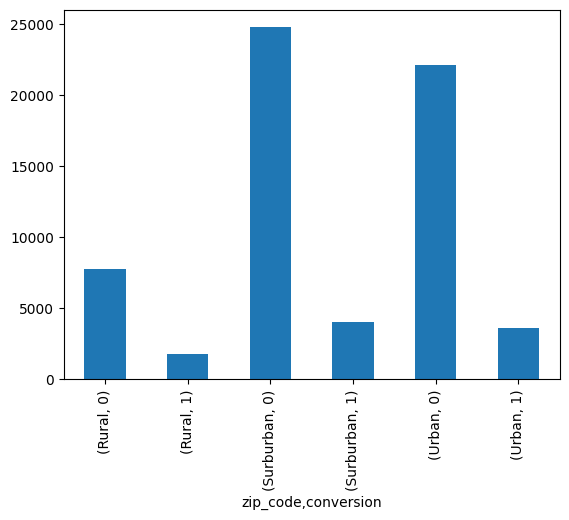

In [10]:
mem.groupby('zip_code')['conversion'].value_counts(sort=False).plot(kind='bar')

In [11]:
merged_df = pd.merge(mem, tran, on='id', how='left')

In [12]:
merged_df

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
0,906145,10,Surburban,0,Phone,0,5,34000
1,906145,10,Surburban,0,Phone,0,1,27000
2,906145,10,Surburban,0,Phone,0,4,33000
3,184478,6,Rural,1,Web,0,4,29000
4,394235,7,Surburban,1,Web,0,4,33000
...,...,...,...,...,...,...,...,...
196831,254229,1,Surburban,0,Web,0,3,33000
196832,254229,1,Surburban,0,Web,0,1,18000
196833,254229,1,Surburban,0,Web,0,3,24000
196834,254229,1,Surburban,0,Web,0,5,14000


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            196836 non-null  int64 
 1   recency       196836 non-null  int64 
 2   zip_code      196836 non-null  object
 3   is_referral   196836 non-null  int64 
 4   channel       196836 non-null  object
 5   conversion    196836 non-null  int64 
 6   num_item      196836 non-null  int64 
 7   total_amount  196836 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 12.0+ MB


In [14]:
merged_df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 196836 entries, 0 to 196835
Series name: id
Non-Null Count   Dtype
--------------   -----
196836 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [15]:
tran[tran['id']==906145][['id','num_item','total_amount']]

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000


In [16]:
merged_df['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [17]:
merged_df = pd.get_dummies(merged_df, columns=['channel'], prefix='channel')


In [18]:
merged_df = pd.get_dummies(merged_df, columns=['zip_code'], prefix='zip_code')


In [19]:
merged_df

,id,recency,is_referral,conversion,num_item,total_amount,channel_Multichannel,channel_Phone,channel_Web,zip_code_Rural,zip_code_Surburban,zip_code_Urban
0,906145,10,0,0,5,34000,False,True,False,False,True,False
1,906145,10,0,0,1,27000,False,True,False,False,True,False
2,906145,10,0,0,4,33000,False,True,False,False,True,False
3,184478,6,1,0,4,29000,False,False,True,True,False,False
4,394235,7,1,0,4,33000,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
196831,254229,1,0,0,3,33000,False,False,True,False,True,False
196832,254229,1,0,0,1,18000,False,False,True,False,True,False
196833,254229,1,0,0,3,24000,False,False,True,False,True,False
196834,254229,1,0,0,5,14000,False,False,True,False,True,False


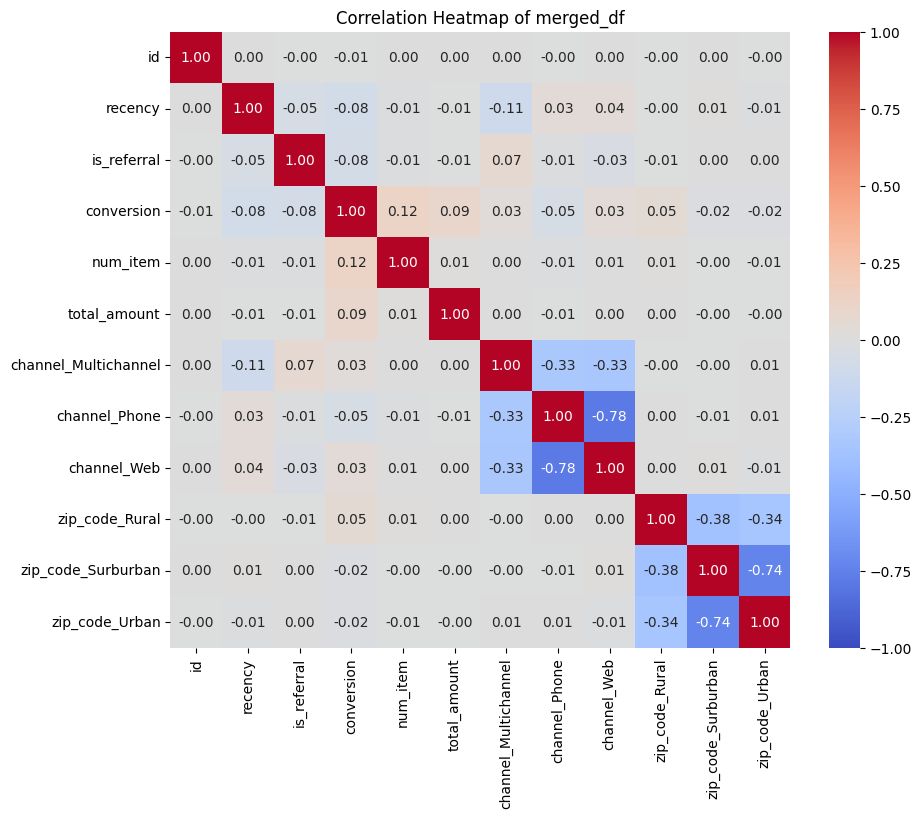

In [20]:
# 상관관계 행렬 계산
corr_matrix = merged_df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of merged_df')
plt.show()

In [21]:
data=merged_df.copy()

In [22]:
X = data.drop(['id','conversion'], axis=1)
y = data['conversion']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, stratify=y, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=7)

In [25]:
len(X_train)

118101

In [26]:
y_train.value_counts()

conversion
0    98458
1    19643
Name: count, dtype: int64

In [27]:
len(X_valid)

39367

In [28]:
len(X_test)

39368

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
for i in range(1,30):
    dtc = DecisionTreeClassifier(max_depth = i, random_state= 7)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_valid)
    print(i,accuracy_score(y_valid, pred))
    print(i,classification_report(y_valid, pred))

1 0.8607971143343409
1               precision    recall  f1-score   support

           0       0.86      1.00      0.92     32820
           1       1.00      0.16      0.28      6547

    accuracy                           0.86     39367
   macro avg       0.93      0.58      0.60     39367
weighted avg       0.88      0.86      0.82     39367

2 0.8744379810501182
2               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weighted avg       0.89      0.87      0.84     39367

3 0.8744379810501182
3               precision    recall  f1-score   support

           0       0.87      1.00      0.93     32820
           1       1.00      0.24      0.39      6547

    accuracy                           0.87     39367
   macro avg       0.93      0.62      0.66     39367
weigh

25 0.8585363375415958
25               precision    recall  f1-score   support

           0       0.87      0.98      0.92     32820
           1       0.69      0.27      0.39      6547

    accuracy                           0.86     39367
   macro avg       0.78      0.62      0.65     39367
weighted avg       0.84      0.86      0.83     39367

26 0.8582823176772424
26               precision    recall  f1-score   support

           0       0.87      0.98      0.92     32820
           1       0.69      0.27      0.39      6547

    accuracy                           0.86     39367
   macro avg       0.78      0.62      0.65     39367
weighted avg       0.84      0.86      0.83     39367

27 0.8582315137043717
27               precision    recall  f1-score   support

           0       0.87      0.98      0.92     32820
           1       0.69      0.27      0.39      6547

    accuracy                           0.86     39367
   macro avg       0.78      0.62      0.65     39367

In [31]:
dtc = DecisionTreeClassifier(max_depth = 29, random_state= 7)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)
print(i,accuracy_score(y_valid, pred))
print(i,classification_report(y_valid, pred))

29 0.8582823176772424
29               precision    recall  f1-score   support

           0       0.87      0.98      0.92     32820
           1       0.69      0.27      0.39      6547

    accuracy                           0.86     39367
   macro avg       0.78      0.62      0.65     39367
weighted avg       0.84      0.86      0.83     39367



In [32]:
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8589717537085958
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     32820
           1       0.69      0.28      0.40      6548

    accuracy                           0.86     39368
   macro avg       0.78      0.63      0.66     39368
weighted avg       0.84      0.86      0.83     39368



In [33]:
X

,recency,is_referral,num_item,total_amount,channel_Multichannel,channel_Phone,channel_Web,zip_code_Rural,zip_code_Surburban,zip_code_Urban
0,10,0,5,34000,False,True,False,False,True,False
1,10,0,1,27000,False,True,False,False,True,False
2,10,0,4,33000,False,True,False,False,True,False
3,6,1,4,29000,False,False,True,True,False,False
4,7,1,4,33000,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
196831,1,0,3,33000,False,False,True,False,True,False
196832,1,0,1,18000,False,False,True,False,True,False
196833,1,0,3,24000,False,False,True,False,True,False
196834,1,0,5,14000,False,False,True,False,True,False


In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
smote = SMOTE(random_state=7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 모델 학습
dtc = DecisionTreeClassifier(max_depth=29, random_state=7)
dtc.fit(X_train_smote, y_train_smote)

# 검증 데이터 예측 및 평가
pred_valid = dtc.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, pred_valid))
print("Validation Classification Report:\n", classification_report(y_valid, pred_valid))

# 테스트 데이터 예측 및 평가
pred_test = dtc.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, pred_test))
print("Test Classification Report:\n", classification_report(y_test, pred_test))

Validation Accuracy: 0.7088932354510122
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81     32820
           1       0.28      0.49      0.36      6547

    accuracy                           0.71     39367
   macro avg       0.58      0.62      0.58     39367
weighted avg       0.78      0.71      0.74     39367

Test Accuracy: 0.7061318837634627
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81     32820
           1       0.28      0.48      0.35      6548

    accuracy                           0.71     39368
   macro avg       0.58      0.61      0.58     39368
weighted avg       0.78      0.71      0.73     39368



In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
k = 5  # k 값 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
# 검증 데이터 예측 및 평가
pred_valid = knn.predict(X_valid)
print("Validation Accuracy:", accuracy_score(y_valid, pred_valid))
print("Validation Classification Report:\n", classification_report(y_valid, pred_valid))

# 테스트 데이터 예측 및 평가
pred_test = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, pred_test))
print("Test Classification Report:\n", classification_report(y_test, pred_test))

Validation Accuracy: 0.8536845581324459
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     32820
           1       0.67      0.24      0.35      6547

    accuracy                           0.85     39367
   macro avg       0.77      0.61      0.63     39367
weighted avg       0.83      0.85      0.82     39367

Test Accuracy: 0.8526976224344646
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     32820
           1       0.66      0.24      0.35      6548

    accuracy                           0.85     39368
   macro avg       0.76      0.61      0.63     39368
weighted avg       0.83      0.85      0.82     39368



* 데이터를 id기준으로 합쳤다.
* 합친 데이터가 mem과 개수가 같을줄 알았는데 달라서 확인해 보니 같은 id이지만 여러번 구매한것으로 판단했다.
* id별로 구매한 전체 갯수, 전체 구매 금액, 구매 횟수 등등 계산해서 데이터를 줄일수있지만 데이터 양을 많은 상태로 유지하는게 더 좋다고 판단하고 진행했다.
* 중복으로 인한 과적합(모델이 일반화 능력을 잃는)이 걱정될 수 있으니 중복된 데이터에 취약한 decisiontree나 knn 모델로 확인해보았다.
* 정확도가 85%가 나왔다. 이정도면 괜찮은거같은데......

In [41]:
merged_df.head()

,id,recency,is_referral,conversion,num_item,total_amount,channel_Multichannel,channel_Phone,channel_Web,zip_code_Rural,zip_code_Surburban,zip_code_Urban
0,906145,10,0,0,5,34000,False,True,False,False,True,False
1,906145,10,0,0,1,27000,False,True,False,False,True,False
2,906145,10,0,0,4,33000,False,True,False,False,True,False
3,184478,6,1,0,4,29000,False,False,True,True,False,False
4,394235,7,1,0,4,33000,False,False,True,False,True,False


In [47]:
# 'id' 열에서 가장 많이 나온 id 찾기
most_frequent_id = merged_df['id'].value_counts().idxmax()

# 해당 id가 몇 번 나왔는지 확인하고 싶다면
most_frequent_id_count = merged_df['id'].value_counts().max()

print(f"가장 많이 나온 id: {most_frequent_id}, 등장 횟수: {most_frequent_id_count}")


가장 많이 나온 id: 254229, 등장 횟수: 5


In [48]:
merged_df[merged_df['id']==254229]

,id,recency,is_referral,conversion,num_item,total_amount,channel_Multichannel,channel_Phone,channel_Web,zip_code_Rural,zip_code_Surburban,zip_code_Urban
196831,254229,1,0,0,3,33000,False,False,True,False,True,False
196832,254229,1,0,0,1,18000,False,False,True,False,True,False
196833,254229,1,0,0,3,24000,False,False,True,False,True,False
196834,254229,1,0,0,5,14000,False,False,True,False,True,False
196835,254229,1,0,0,5,33000,False,False,True,False,True,False


## 독립변수들 간에 단위 차이가 너무 클 때 => 스케일링 필요
* Min-Max scaler: 모든 숫자를 0-1 사이의 숫자로 변환- 데이터 분포의 모양을 그대로 유지
* Standard Scaler: 평균을 0, 표준편차를 1로 하는 정규분포의 형태로 변환- 데이터 분포
* Robust Scaler: 사분위수를 이용해서 데이터를 스케일링- 데이터에 이상값이 있을 때 영향을 받지 않음

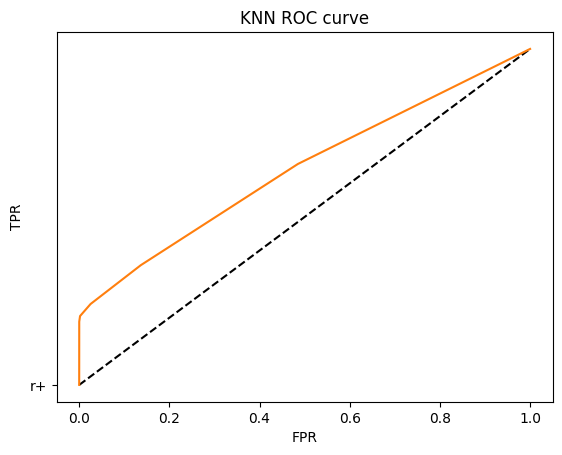

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN ROC curve')
plt.show()

# 서포트벡터 svc를 사용해서 분석
# 클래스 불균형 해소를 위한 데이터 증폭/축소
# RandomizedSearchCV를 이용한 svc 하이퍼 파라미터 튜닝

In [51]:
data2=merged_df.copy()

In [52]:
data2

,id,recency,is_referral,conversion,num_item,total_amount,channel_Multichannel,channel_Phone,channel_Web,zip_code_Rural,zip_code_Surburban,zip_code_Urban
0,906145,10,0,0,5,34000,False,True,False,False,True,False
1,906145,10,0,0,1,27000,False,True,False,False,True,False
2,906145,10,0,0,4,33000,False,True,False,False,True,False
3,184478,6,1,0,4,29000,False,False,True,True,False,False
4,394235,7,1,0,4,33000,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
196831,254229,1,0,0,3,33000,False,False,True,False,True,False
196832,254229,1,0,0,1,18000,False,False,True,False,True,False
196833,254229,1,0,0,3,24000,False,False,True,False,True,False
196834,254229,1,0,0,5,14000,False,False,True,False,True,False


In [53]:
X2 = data2.drop(['id','conversion'], axis=1)
y2 = data2['conversion']

In [54]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2, test_size=0.4, stratify=y2, random_state=7)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=7)

In [55]:
from sklearn.svm import SVC

In [ ]:
# SVC 모델 생성 및 학습
svc_model = SVC(C=1.0, kernel='linear', gamma='scale', class_weight='balanced', random_state=7)

svc_model.fit(X_train2, y_train2)

# 검증 데이터 예측 및 평가
pred_valid2 = svc_model.predict(X_valid2)
print("Validation Accuracy:", accuracy_score(y_valid2, pred_valid2))
print("Validation Classification Report:\n", classification_report(y_valid2, pred_valid2))

# 테스트 데이터 예측 및 평가
pred_test2 = svc_model.predict(X_test2)
print("Test Accuracy:", accuracy_score(y_test2, pred_test2))
print("Test Classification Report:\n", classification_report(y_test2, pred_test2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler